# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data_us.csv', sep='\t')
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

In [3]:
data.isnull().sum()

date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area          2278
living_area           1903
total_area               0
balconies            11519
ceiling_height        9195
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      5519
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
print(data['locality_name'].sort_values().unique())

['Agalatovo village' 'Aleksandrovskaya village' 'Annino village'
 'Aro village' 'Baryshevo village' 'Batovo village' 'Beloostrov village'
 'Boksitogorsk' 'Bolshaya Izhora village' 'Bolshaya Vruda village'
 'Bolshiye Kolpany village' 'Bolshoy Sabsk village'
 'Bolshoye Reyzino village' 'Bor village' 'Borisova Griva village'
 'Bugry village' 'Chudskoy Bor village' 'Druzhnaya Gorka village'
 'Druzhnoselye village' 'Dubrovka village' 'Dzerzhinskogo village'
 'Elizavetino village' 'Falileyevo village' 'Fort Krasnaya Gorka village'
 'Fyodorovskoye' 'Garbolovo village' 'Gatchina' 'Gavrilovo village'
 'Gladkoye village' 'Glazhevo village' 'Glebychevo village'
 'Glinka village' 'Goncharovo village' 'Gorbunki village'
 'Gostilitsy village' 'Gromovo village' 'Hapo-Oe village'
 'Ilichyovo village' 'Issad village' 'Ivangorod' 'Izvara village'
 'Kalitino village' 'Kalozhitsy village' 'Kaltino village' 'Kamennogorsk'
 'Kamyshovka village' 'Kaskovo village' 'Kelozi village'
 'Khyazelky village' 'Kingis

### Conclusion

From the beginning we see that there are a lot of missing variables that we'll have to replace. We also would like to transfer values in date_posted column into a more readable data_time format. Next, we see what data types are held in every column, and having float64 in balconies, floors_total and days_listed is not really helpful. So we'll probably cast those elements as integers. Next we see that there are no apparent duplicates, so we check locality_name column, as it might have non-transparent duplicates. For one, we see instances like 'Kudrino' and 'Kudrino village' which might actually refer to the same place, so we'll analyze this column further. To sum up:
- We have a lot of missing variables we have to analyze
- We'll transform dates listed in our dataset into a more readable format (Year-month-day)
- Changing data_types is needed for specific columns
- There are similar values in 'locality_name' column, which potentially might be duplicates


<div class="alert alert-success" role="alert">
Hey, that's a decent start! Very thorough study and neat formatting style ;) 
</div>

### Step 2. Data preprocessing

#### Filling missing values

In [6]:
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


Changing days_listed to 0 or median might significantly affect our results, so let's keep them as NaN for now  

In [7]:
nan_area = data[data['living_area'].isnull()]
nan_area.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
7,2019-04-18T00:00:00,NaN,158300.0,2,18.9,NaN,71.6,2.0,NaN,24.0,...,NaN,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
30,2018-02-19T00:00:00,63.0,44000.0,1,NaN,NaN,32.8,NaN,NaN,9.0,...,NaN,False,False,Kommunar,NaN,NaN,NaN,NaN,NaN,NaN
37,2017-10-28T00:00:00,196.0,39800.0,2,NaN,NaN,45.8,NaN,2.5,5.0,...,NaN,False,False,village Krasny Bor,NaN,NaN,NaN,NaN,NaN,NaN
44,2018-11-18T00:00:00,NaN,107000.0,1,NaN,NaN,40.0,1.0,NaN,22.0,...,NaN,False,False,Saint Petersburg,30471.0,11603.0,620.0,1.0,1152.0,1.0


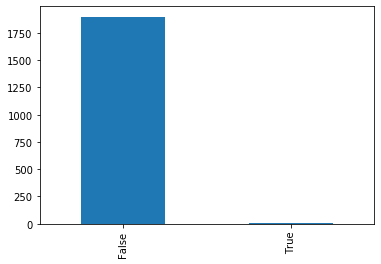

In [9]:
nan_area['is_open_plan'].value_counts().plot(kind='bar')
plt.show()

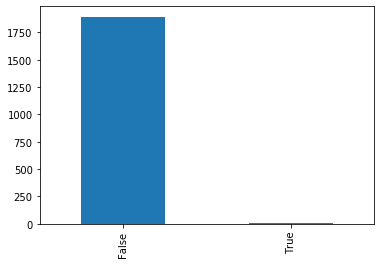

In [8]:
nan_area['is_studio'].value_counts().plot(kind='bar')
plt.show()

Seems like both open_plan and studio apartments have similar shares of missing variables, so mossing variables are not prone to a specific type of an apartment. So let's fill all of them in the same fashion

In [10]:
avg_ratio = data['total_area']/data['living_area']
avg_ratio = avg_ratio.median()
avg_ratio

1.7609977447984868

In [11]:
data.loc[data['living_area'].isnull(),'living_area'] = data['total_area']/avg_ratio    

In [13]:
nan_area['living_area'] = nan_area['total_area']/avg_ratio


C:\Users\shakh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
nan_area[nan_area['living_area'].isnull()]

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000


In [15]:
len(nan_area['living_area'])

1903

In [17]:
len(data[data['living_area'].isnull()])

0

In [18]:
data.loc[data['kitchen_area'].isnull(),'kitchen_area'] = data['total_area'] - data['living_area']

In [19]:
len(data[data['kitchen_area'].isnull()])

0

<div class="alert alert-info" role="alert">   
I decided to follow the simple approach and count kitchen_area as the result of the subraction of total_area and living_area. We could also use the specific average ratio, but then we might miss out some area, like bathroom areas. So I wasn't sure.
</div>

<div class="alert alert-success" role="alert">   
I think it might do just fine as well =)
</div>

<div class="alert alert-success" role="alert">
Ok, that's actually flawlessly done! Most people simply replace living area with median area for all living rooms, and that's incorrect. But you actually figured this out and calculated the ratio first, GJ! =)


</div>

It's likely that when an apartment didn't have any balconies, the data was simply not entered. So let's fill missing balconies values as 0

In [20]:
data['balconies'] = data['balconies'].fillna(0)

In [21]:
ceiling_med = data['ceiling_height'].median()
ceiling_med

2.65

In [22]:
ceiling_min = data['ceiling_height'].min()
ceiling_min

1.0

In [23]:
ceiling_max = max(data['ceiling_height'])
ceiling_max

100.0

We see that there is a big discrepancy in ceiling heights. But we could probaly reasonably expect the height to be between 2.5 and 5 meters. So let's use median to fill in the missing variables

In [24]:
data.loc[data['ceiling_height'].isnull(),'ceiling_height'] = ceiling_med
len(data[data['ceiling_height'].isnull()])

0

In [63]:
data['floors_total'] = data['floors_total'].fillna(1)

Transforming date_posted column into a more readable Year-month-day format

In [26]:
data['date_posted'] = pd.to_datetime(data['date_posted'],format = '%Y-%m-%d')

To fill in the missing variables  in the airport_dist and city_center_dist columns, let's calculate the median values of those columns for each locality.

In [27]:
mdt = data.pivot_table(index='locality_name', values=['airport_dist','city_center_dist'], aggfunc='median')
mdt

,airport_dist,city_center_dist
locality_name,,
Aleksandrovskaya village,12896.5,27468.0
Beloostrov village,57769.0,38868.0
Kolpino,26232.0,32018.0
Krasnoye Selo,25715.5,29140.5
Kronshtadt,67850.0,49575.0
Levashovo village,52693.0,25727.0
Lisiy Nos village,55909.0,28226.0
Lomonosov,48415.5,51677.0
Metallostroy village,25758.0,27602.0


In [28]:
def close_approximation(data_row, data_col):
    name = data_row['locality_name']
    if name in list(mdt.index):
        return mdt.loc[name][data_col]
    else:
        return data_row[data_col]

In [29]:
cols = ['airport_dist','city_center_dist']

for elem in cols:
    data.loc[data[elem].isnull(), elem]= data.apply(close_approximation,axis=1,args=(cols,))

In [30]:
len(data[data['city_center_dist'].isnull()]['locality_name'].unique())
#amount of the still mistsing entries in the localities


300

<div class="alert alert-success" role="alert">
That's a very good thinking and in general a perfectly correct approach, well done!

</div>

In [31]:
data.isnull().sum()


date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area             0
living_area              0
total_area               0
balconies                0
ceiling_height           0
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          4872
city_center_dist      4872
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

<div class="alert alert-success" role="alert">
<b>All in all, this step was done perfectly. Very good thinking!</b>
</div>

### Step 3. Make calculations and add them to the table

    the price per square meter
    the day of the week, month, and year that the ad was published
    which floor the apartment is on (first, last, or other)
    the ratio between the living space and the total area, as well as between the kitchen space and the total area.

-- the price per square meter

In [32]:
data['square_meter_price'] = data['last_price']/data['total_area']

--     the day of the week, month, and year that the ad was published

In [33]:
data['day_ad_published'] = data['date_posted'].dt.dayofweek
data['month_ad_published'] = data['date_posted'].dt.month
data['year_ad_published'] = data['date_posted'].dt.year

--    which floor the apartment is on (first, last, or other)


In [34]:
data['floor']

0         8
1         1
2         4
3         9
4        13
         ..
23694     3
23695     4
23696     1
23697    12
23698     1
Name: floor, Length: 23699, dtype: int64

In [35]:
def fl(row):


    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
    
data.loc[:, 'floor'] = data.apply(fl, axis=1)

In [36]:
data['floor'].value_counts()

other    17446
last      3336
first     2917
Name: floor, dtype: int64

--     the ratio between the living space and the total area

In [37]:
data['living_total_ratio'] = data['living_area']/data['total_area']

-- the ratio between the kitchen space and the total area.

In [38]:
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']

In [39]:
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,park_dist,parks_within_3000,pond_dist,ponds_within_3000,square_meter_price,day_ad_published,month_ad_published,year_ad_published,living_total_ratio,kitchen_total_ratio
0,2019-03-07,NaN,260000.0,3,25.000000,51.000000,108.0,0.0,2.70,16.0,...,482.0,1.0,755.0,2.0,2407.407407,3,3,2019,0.472222,0.231481
1,2018-12-04,81.0,67000.0,1,11.000000,18.600000,40.4,2.0,2.65,11.0,...,NaN,0.0,NaN,0.0,1658.415842,1,12,2018,0.460396,0.272277
2,2015-08-20,558.0,103920.0,2,8.300000,34.300000,56.0,0.0,2.65,5.0,...,90.0,1.0,574.0,2.0,1855.714286,3,8,2015,0.612500,0.148214
3,2015-07-24,424.0,1298000.0,3,68.710276,90.289724,159.0,0.0,2.65,14.0,...,84.0,2.0,234.0,3.0,8163.522013,4,7,2015,0.567860,0.432140
4,2018-06-19,121.0,200000.0,2,41.000000,32.000000,100.0,0.0,3.03,14.0,...,112.0,2.0,48.0,1.0,2000.000000,1,6,2018,0.320000,0.410000


<div class="alert alert-success" role="alert">
Everything is correct, nice!
</div>

### Step 4. Conduct exploratory data analysis :

## -- Exploring the last_price (total price) parameter

In [40]:
data.columns

Index(['date_posted', 'days_listed', 'last_price', 'bedrooms', 'kitchen_area',
       'living_area', 'total_area', 'balconies', 'ceiling_height',
       'floors_total', 'floor', 'total_images', 'bike_parking', 'is_studio',
       'is_open_plan', 'locality_name', 'airport_dist', 'city_center_dist',
       'park_dist', 'parks_within_3000', 'pond_dist', 'ponds_within_3000',
       'square_meter_price', 'day_ad_published', 'month_ad_published',
       'year_ad_published', 'living_total_ratio', 'kitchen_total_ratio'],
      dtype='object')

In [41]:
data['last_price'].describe()

count    2.369900e+04
mean     1.308310e+05
std      2.177403e+05
min      2.440000e+02
25%      6.800000e+04
50%      9.300000e+04
75%      1.360000e+05
max      1.526000e+07
Name: last_price, dtype: float64

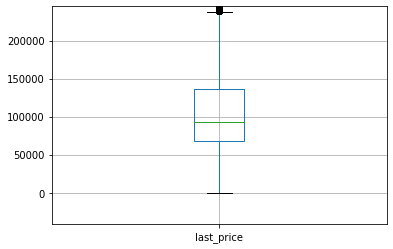

In [42]:
plt.ylim(6.800000e+04-2.177403e+05/2,1.360000e+05+2.177403e+05/2)
data.boxplot('last_price')
plt.show()

The middle 50% of the data lie between 6.800000e+04 and 1.360000e+05. The lower tail is around 0, while the upper tail is around 230000

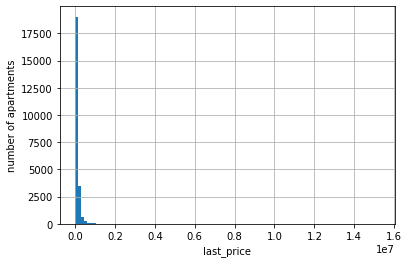

In [43]:
plt.ylabel('number of apartments')
plt.xlabel('last_price')
data['last_price'].hist(bins=100)
plt.show()

The distribution seems suspicious. We have an unusual peak around 0, so let's investigate further. 

In [44]:
sth = data.query('last_price < 6.800000e+04')
sth.sort_values('last_price')

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,park_dist,parks_within_3000,pond_dist,ponds_within_3000,square_meter_price,day_ad_published,month_ad_published,year_ad_published,living_total_ratio,kitchen_total_ratio
8793,2019-03-20,8.0,244.0,2,40.500000,32.000000,109.0,0.0,2.75,25.0,...,805.0,1.0,NaN,0.0,2.238532,2,3,2019,0.293578,0.371560
14911,2018-06-26,44.0,8600.0,2,23.335566,30.664434,54.0,0.0,2.65,3.0,...,NaN,NaN,NaN,NaN,159.259259,1,6,2018,0.567860,0.432140
17456,2019-04-22,NaN,8600.0,1,6.000000,16.000000,30.4,0.0,2.65,2.0,...,NaN,NaN,NaN,NaN,282.894737,0,4,2019,0.526316,0.197368
16274,2018-07-10,45.0,8800.0,1,17.285604,22.714396,40.0,0.0,2.65,5.0,...,NaN,NaN,NaN,NaN,220.000000,1,7,2018,0.567860,0.432140
5698,2017-07-31,233.0,9000.0,2,5.800000,23.000000,42.0,0.0,2.65,1.0,...,NaN,NaN,NaN,NaN,214.285714,0,7,2017,0.547619,0.138095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22991,2015-03-19,804.0,67980.0,1,8.100000,15.400000,31.1,1.0,2.65,9.0,...,NaN,0.0,NaN,0.0,2185.852090,3,3,2015,0.495177,0.260450
23593,2017-12-10,123.0,67980.0,1,10.000000,17.000000,35.0,2.0,2.70,18.0,...,NaN,NaN,NaN,NaN,1942.285714,6,12,2017,0.485714,0.285714
2400,2017-11-10,203.0,67980.0,1,8.100000,15.400000,30.4,0.0,2.65,9.0,...,278.0,2.0,NaN,0.0,2236.184211,4,11,2017,0.506579,0.266447
2088,2018-03-27,125.0,67980.0,3,8.300000,43.800000,74.2,0.0,2.50,9.0,...,NaN,NaN,NaN,NaN,916.172507,1,3,2018,0.590296,0.111860


Ha! In the first row, we see an apartment with total_area=109.0 and price 244.0. Such a big apartment can't be so cheap so let's see how the distribution looks without this outlier. Also let's limit the uppe price to the 75%+std/2

[]

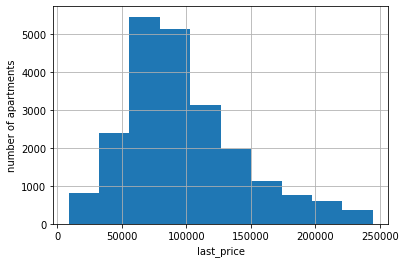

In [45]:
plt.xlabel('last_price')
plt.ylabel('number of apartments')
data.query('last_price>244.0 and last_price<=1.360000e+05++2.177403e+05/2')['last_price'].hist(bins=10)
plt.plot()

## -- Exploring the number of bedrooms parameter

In [46]:
data['bedrooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64

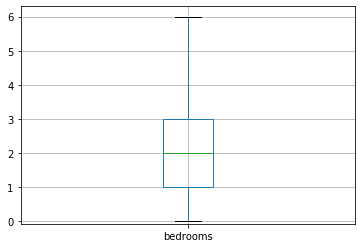

In [47]:
plt.ylim(1-1.078405,6.3)
data.boxplot('bedrooms')
plt.show()

Look at the distribution and examine (potentially get rid of) the outliers

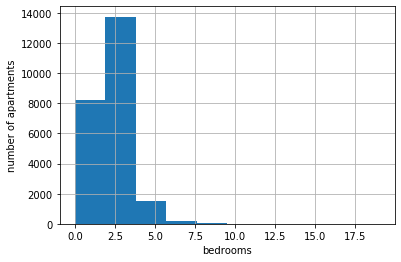

In [48]:
plt.xlabel('bedrooms')
plt.ylabel('number of apartments')
data['bedrooms'].hist()
plt.show()

All apartments should have at least one bedroom, and they usually have no more than 6 bedrooms, so let's look at the modified distribution

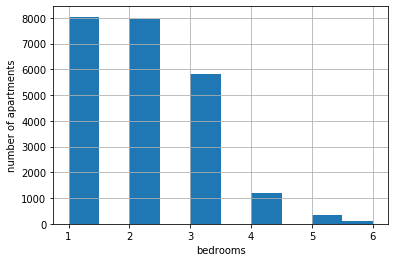

In [49]:
plt.xlabel('bedrooms')
plt.ylabel('number of apartments')
data.query('bedrooms>0 and bedrooms<7')['bedrooms'].hist()
plt.show()


This distribution is clearer, and gives us a better idea of what are the most sought after amount of bedrooms. 

## -- Exploring the total_area parameter

In [50]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

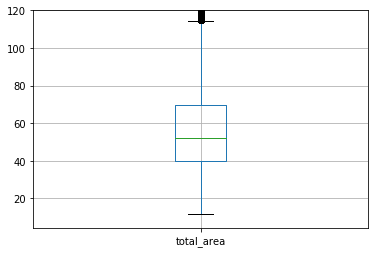

In [51]:
plt.ylim(40.000000 - 35.654083, 120)
data.boxplot('total_area')
plt.show()

The middle 50% of the data lies between 40.000000 and 69.900000. The lower tail is around 12, while the upper tail is around 118.

Examining the data within the two tails of the boxplot, i.e getting rid of the outliers. 

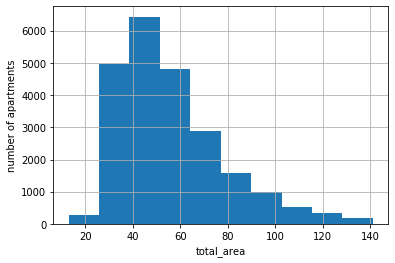

In [52]:
plt.xlabel('total_area')
plt.ylabel('number of apartments')
data.query('total_area>12 and total_area<69.900000+(2*35.654083)')['total_area'].hist()
plt.show()

## -- Exploring the ceiling_height parameter

In [53]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

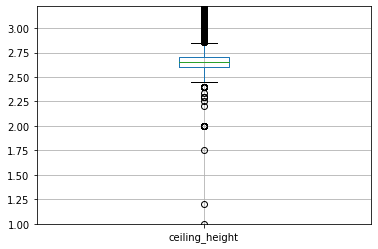

In [54]:
plt.ylim(1, 2.800000+1.261056/3)
data.boxplot('ceiling_height')
plt.show()

The middle 50% of the data lies between 2.520000 and 2.800000. The lower tail is around 2.18, while the upper tail is around 2.80.

Looking at the distribution without outliers

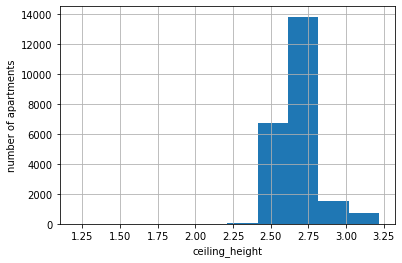

In [59]:
plt.xlabel('ceiling_height')
plt.ylabel('number of apartments')
data.query('ceiling_height>1 and ceiling_height<2.800000+1.261056/3')['ceiling_height'].hist()
plt.show()

### -- Examine the time it's taken to sell the apartment and plot a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered to have happened rather quickly or taken an extra long time?

In [60]:
data['days_listed'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_listed, dtype: float64

Let's look at the boxplot and set the y-limits

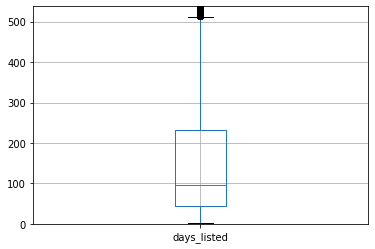

In [61]:
plt.ylim(0, 199+2*169.360226)
data.boxplot('days_listed')
plt.show()

The middle 50% of the data lies between 45.000000 and 199.000000. The lower tail is around 0, while the upper tail is around 430.

Let's make a histogram without outliers

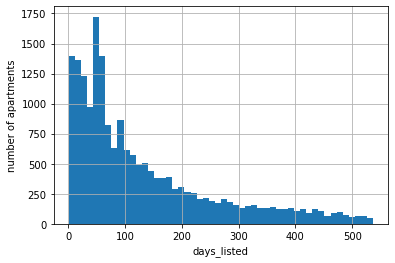

In [62]:
plt.xlabel('days_listed')
plt.ylabel('number of apartments')
data.query('days_listed>=0 and days_listed<=199+2*169.360226')['days_listed'].hist(bins=50)
plt.show()

<div class="alert alert-success" role="alert">
Very nice way of dealing with outliers!

</div>

### Studying the factors that have had the biggest ingluence on apartment's price

###### Relationship between the price and total_area

In [63]:

#filtered last price
filt_last_price = 'last_price>244.0 and last_price<=1.360000e+05++2.177403e+05/2'

#filtered total area
filt_total_area = 'total_area>12 and total_area<69.900000+(2*35.654083)'


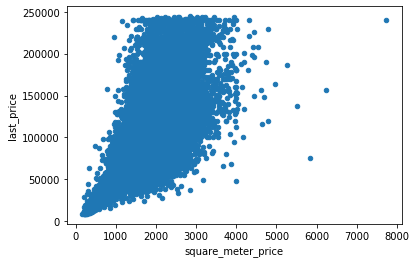

In [64]:
rl_price_area = data.query(filt_total_area and filt_last_price)
rl_price_area.plot(y='last_price', x='square_meter_price', kind= 'scatter')
plt.show()

In [65]:
rl_price_area['square_meter_price'].corr(rl_price_area['last_price'])

0.6079919951732645

For the scatterplot and correlation coefficient we see that the realtion between the square_meter_price and last_price is moderately strong

###### Relationship between the price and number of rooms

In [66]:
filt_bedrooms = 'bedrooms>0 and bedrooms<7'

In [67]:
rl_price_bedrooms = data.query(filt_bedrooms and filt_last_price)

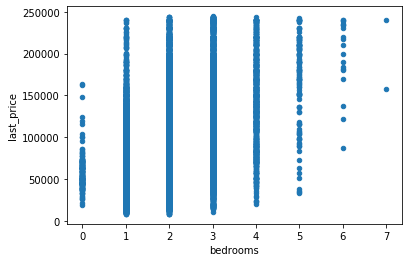

In [68]:
rl_price_bedrooms.plot(x='bedrooms',y='last_price',kind='scatter')

In [69]:
rl_price_bedrooms['last_price'].corr(rl_price_bedrooms['bedrooms'])

0.45871395056320574

For the scatterplot and correlation coefficient we see that the realtion between the bedrooms and last_price is moderately weak.

###### Relationship between the price and the floor location

In [70]:
filt_floors = data[['floor','last_price']].query(filt_last_price)
filt_floors.min()


floor         first
last_price     8600
dtype: object

In [71]:
filt_floors.max()

floor          other
last_price    244622
dtype: object

The first floor seems to be the cheapest while the 'other' floors are more expensive

###### Relationship between the price and the city_center dist

In [72]:
filt_dist = data[['city_center_dist','last_price']].query(filt_last_price)
filt_dist

,city_center_dist,last_price
1,18603.0,67000.0
2,13933.0,103920.0
4,8098.0,200000.0
5,NaN,57800.0
6,19143.0,74000.0
...,...,...
23694,4232.0,194000.0
23695,NaN,62000.0
23696,NaN,50000.0
23697,10364.0,229500.0


In [73]:
filt_dist['city_center_dist'].corr(filt_dist['last_price'])

-0.36431788963682477

<div class="alert alert-success" role="alert">
Those are very nice graphs and some solid conclusions! I liked that!

</div>

From correlation coefficient we see that the relation between the city_center_dist and last_price is weak.

###### Realtionship between the price and the publication date

In [74]:
filt_days = 'days_listed>=0 and days_listed<=199+2*169.360226'
rl_days_price = data.query(filt_days and filt_last_price)

In [75]:
rl_days_price[[ 'day_ad_published','month_ad_published','year_ad_published','last_price']].corr()

,day_ad_published,month_ad_published,year_ad_published,last_price
day_ad_published,1.000000,0.011603,-0.004481,-0.014864
month_ad_published,0.011603,1.000000,-0.266464,0.005724
year_ad_published,-0.004481,-0.266464,1.000000,-0.006369
last_price,-0.014864,0.005724,-0.006369,1.000000


From the table and the correlation coefficient we see that there's almost no relationship between the price and the publication date 

Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. Determine which ones have the highest and lowest housing prices. You can find this data by name in the ’locality_name’ column.

In [76]:
ten_localities = data['locality_name'].value_counts().head(10)


In [77]:
filt_loc = data.query('locality_name in @ten_localities.index and last_price>244.0')
filt_loc = filt_loc.query('last_price<=1.360000e+05++2.177403e+05/2')
filt_loc.pivot_table(index='locality_name',values='square_meter_price').sort_values(by='square_meter_price',ascending=False)

,square_meter_price
locality_name,
Saint Petersburg,2113.592577
Pushkin,2009.791316
Kudrovo village,1848.194463
Pargolovo village,1803.518265
Murino village,1713.635239
Shushary village,1573.547285
Kolpino,1503.709498
Gatchina,1368.438043
Vsevolozhsk,1344.285080


Apartments in the Saint Petersburg are the most expensive

<div class="alert alert-success" role="alert">
Correct!

</div>

###### Closer look at Saint Petesburg

In [78]:
sp_apartments = pd.DataFrame(data.loc[data['locality_name'] == "Saint Petersburg"]).reset_index()
sp_apartments.tail()

,index,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,...,park_dist,parks_within_3000,pond_dist,ponds_within_3000,square_meter_price,day_ad_published,month_ad_published,year_ad_published,living_total_ratio,kitchen_total_ratio
15716,23689,2018-02-28,29.0,71000.0,1,9.10,16.300000,35.30,2.0,2.86,...,353.0,1.0,652.0,2.0,2011.331445,2,2,2018,0.461756,0.257790
15717,23690,2018-07-19,15.0,110000.0,2,6.00,31.000000,52.00,0.0,2.65,...,300.0,1.0,NaN,0.0,2115.384615,3,7,2018,0.596154,0.115385
15718,23691,2016-10-13,519.0,189400.0,2,10.60,40.300000,72.90,1.0,2.75,...,NaN,0.0,806.0,1.0,2598.079561,3,10,2016,0.552812,0.145405
15719,23694,2017-03-21,NaN,194000.0,3,13.83,73.300000,133.81,0.0,3.70,...,796.0,1.0,381.0,3.0,1449.816905,1,3,2017,0.547792,0.103356
15720,23697,2017-03-28,602.0,229500.0,2,23.30,43.583247,76.75,2.0,3.00,...,173.0,2.0,196.0,3.0,2990.228013,1,3,2017,0.567860,0.303583


In [79]:
#tranferring meter distances into km distances
sp_apartments['center_km'] = sp_apartments['city_center_dist']/1000
sp_apartments['center_km'] = sp_apartments['center_km'].astype(int)

-- calculate the average price for each kilometer

In [80]:
sp_prices = sp_apartments.query(filt_last_price)

In [81]:
res = sp_prices.pivot_table(index='center_km', values='last_price')
res

,last_price
center_km,
0,170264.000000
1,167933.698630
2,154426.841026
3,151965.746736
4,157869.326531
5,149468.011538
6,138394.507645
7,135312.287097
8,128298.593972


Let's graphically depict the realtinship between the price the distance from the center in Saint Petersburg

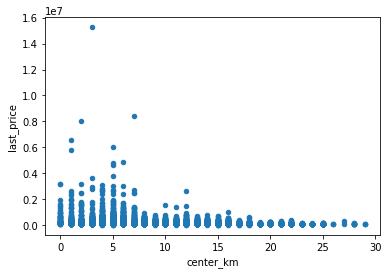

In [82]:
sp_apartments.plot(x='center_km',y='last_price',kind='scatter')
plt.show()

We see the price variation changes (and the price decreases) as center_km increases. It seems like the prices out of center are somewhat similar. Let's choose the center_km point where the price change is significant between neigboring center_km. It seems like 8 km is a good choice, but then price varies again after that, and stops after 12 km So let's choose 12km as our center borderline.

In [83]:
central_apartments = pd.DataFrame(sp_apartments.query('center_km<=12'))

In [84]:
#analyzing correlations between parameters
param = [
    'last_price',
    'center_km',
    'total_area',
    'bedrooms',
    'ceiling_height',
    'day_ad_published',
    'month_ad_published',
    'year_ad_published'
]
sp_filt_data = central_apartments.query(filt_last_price and filt_total_area and filt_days and filt_bedrooms) 

In [85]:
sp_filt_data[param].corr()

,last_price,center_km,total_area,bedrooms,ceiling_height,day_ad_published,month_ad_published,year_ad_published
last_price,1.000000,-0.274765,0.689948,0.376972,0.065890,0.011341,-0.010158,-0.066726
center_km,-0.274765,1.000000,-0.380183,-0.331022,-0.108869,0.019311,-0.000409,0.106412
total_area,0.689948,-0.380183,1.000000,0.745421,0.075854,-0.000270,0.002588,-0.119460
bedrooms,0.376972,-0.331022,0.745421,1.000000,0.048323,-0.015167,0.006310,-0.084621
ceiling_height,0.065890,-0.108869,0.075854,0.048323,1.000000,-0.020066,-0.003690,0.002537
day_ad_published,0.011341,0.019311,-0.000270,-0.015167,-0.020066,1.000000,0.001384,0.006703
month_ad_published,-0.010158,-0.000409,0.002588,0.006310,-0.003690,0.001384,1.000000,-0.280058
year_ad_published,-0.066726,0.106412,-0.119460,-0.084621,0.002537,0.006703,-0.280058,1.000000


### Step 5. Overall conclusion

In Step 1: I looked at the provided dataset, to get a perception of what should be done. The dataset had a lot of missing variables, almost no dupllicates and some mismatched data types which we had to change.

In Step 2: We took a preliminary step towards solving those problems. First, we needed to fill mising values in the 'living_area' column. There is a possibility that the median value of the column might be bigger than the actual living and even total area, so we needed to explore the column in depth. We know that there are two types of apartments, namely open plan apartments and studio apartments, so we needed to check are the variables in these two kind of apartments are more prone to being missing in our dataset. If that was the case, then we'd had to investigate and fill in the missing variables in only one type of the apartment. However, after checking and graphing the distribution we see that the percentage of the missing values is roughly the same in both types. There are two strategies we could use to fill in the missing values: 1) use an average ratio of total_area to living_area; 2) group apartments by the number of bedrooms and take the average in each separate group. After doing that, we mostly used median and transformed datatypes.  Also, to fill in the airport_dist and city_center_dist, we sliced the dataset by localities and used individual medians to fill in the missing values in each locality. 

In Steps 3 & 4: We calculated the ratios and plotted graphs to identify the patterns. To make things clearer we got rid of the outliers (using boxplots, although we could use the log scale), re-draw the graphs and drew our conclusions. We also saw that the apartment is Saint Peterburg are the most expensive, so we analyzed them separately. Our conclusions for Saint Petersburg and in general were very similar. Namely we saw that:  

- Apartments in Saint Petersburg are more expensive
- The closer the apartment to the center the more expensive it is
- Factors such as ceiling_height, total_area, and number of bedrooms considerably affect the prices ( the correlation is positive, so as our factors increase the price increases as well)
- First floor apartments are generally cheaper than others, and people mostly want apartments between the first and the last floor. 


<div class="alert alert-success" role="alert">
All in all, I was very impressed by how thoroughly and diligently you did all of the steps, and by your critical thinking approach. I think this project has an incredible potential and after you fix those few notes that I left I will gladly consider it accepted. Good luck!
</div>

<div class="alert alert-info" role="alert">
    I tried providing more info, and hope that's what you meant:) Thanks a lot for the detailed feedback, and my huge gratitude for the fast checking! I am behind the deadline and have to complete 2 more projects this week, so your timing really helps me. I don't want to get dropped out, so I'll try to do them soon. Once again, thank you)
</div>

<div class="alert alert-success" role="alert">
You did a fantastic job with second iteration, I liked every comment! And your conclusions were really solid this time. I left a couple of "yellow" notes, which are more like general advices. You can return to them whenever you want ;)
    
But yeah, as much as it was a pleasure reviewing your work, I think you're ready now =) So, I'm accepting your project and wish you best of luck in your future studies!
    
Cheers!
</div>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn